In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ShippingData") \
    .getOrCreate()


25/05/11 19:10:41 WARN Utils: Your hostname, Madhavis-MacBook-Air-2.local resolves to a loopback address: 127.0.0.1; using 10.0.0.36 instead (on interface en0)
25/05/11 19:10:41 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/11 19:10:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [132]:
sample_df = df_spark.limit(1000)
sample_df.write.mode("overwrite").option("header", "true").csv("shipping_data_sample")

In [128]:
df_spark = spark.read.option("header", "true").option("inferSchema", "true") \
    .csv("hdfs://localhost:9000/user/madhavi/synthetic_shipping_data.csv")

df_spark.printSchema()
df_spark.show(5)

root
 |-- sourcecity: string (nullable = true)
 |-- destinationcity: string (nullable = true)
 |-- distance_km: double (nullable = true)
 |-- duration_hr: double (nullable = true)
 |-- weather_description: string (nullable = true)
 |-- temperature_c: double (nullable = true)
 |-- truck_type: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)

+-------------+------------------+------------------+-------------------+-------------------+------------------+-----------+-------------------+
|   sourcecity|   destinationcity|       distance_km|        duration_hr|weather_description|     temperature_c| truck_type|          timestamp|
+-------------+------------------+------------------+-------------------+-------------------+------------------+-----------+-------------------+
|  Houston, TX|     Baltimore, MD| 4433.278670577099| 34.897401117080186|      Partly cloudy|25.651720928878703| Heavy Duty|2023-01-01 00:00:00|
|   Boston, MA|       Seattle, WA|2946.2855411433366|  25

In [130]:
df_spark.write.mode("overwrite").parquet("hdfs://localhost:9000/user/madhavi/synthetic_shipping_data_parquet")


25/05/11 23:17:30 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/05/11 23:17:35 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/05/11 23:17:35 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/05/11 23:17:35 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/05/11 23:17:38 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/05/11 23:17:38 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/05/11 23:17:38 WARN MemoryManager: Total allocation exceeds 95.00% 

Py4JJavaError: An error occurred while calling o194.parquet.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 167 in stage 55.0 failed 1 times, most recent failure: Lost task 167.0 in stage 55.0 (TID 956) (10.0.0.36 executor driver): org.apache.spark.SparkException: [TASK_WRITE_FAILED] Task failed while writing rows to hdfs://localhost:9000/user/madhavi/synthetic_shipping_data_parquet.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.taskFailedWhileWritingRowsError(QueryExecutionErrors.scala:775)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:420)
	at org.apache.spark.sql.execution.datasources.WriteFilesExec.$anonfun$doExecuteWrite$1(WriteFiles.scala:100)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.hadoop.ipc.RemoteException(java.io.IOException): File /user/madhavi/synthetic_shipping_data_parquet/_temporary/0/_temporary/attempt_20250511231730259098368038626101_0055_m_000167_956/part-00167-2049fa31-b8ee-47cb-ba8e-a87998f141cd-c000.snappy.parquet could only be written to 0 of the 1 minReplication nodes. There are 1 datanode(s) running and 1 node(s) are excluded in this operation.
	at org.apache.hadoop.hdfs.server.blockmanagement.BlockManager.chooseTarget4NewBlock(BlockManager.java:2473)
	at org.apache.hadoop.hdfs.server.namenode.FSDirWriteFileOp.chooseTargetForNewBlock(FSDirWriteFileOp.java:293)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.getAdditionalBlock(FSNamesystem.java:3075)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.addBlock(NameNodeRpcServer.java:932)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.addBlock(ClientNamenodeProtocolServerSideTranslatorPB.java:603)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$ClientNamenodeProtocol$2.callBlockingMethod(ClientNamenodeProtocolProtos.java)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine2.java:621)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine2.java:589)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine2.java:573)
	at org.apache.hadoop.ipc.RPC$Server.call(RPC.java:1227)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:1246)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:1169)
	at java.base/java.security.AccessController.doPrivileged(Native Method)
	at java.base/javax.security.auth.Subject.doAs(Subject.java:423)
	at org.apache.hadoop.security.UserGroupInformation.doAs(UserGroupInformation.java:1953)
	at org.apache.hadoop.ipc.Server$Handler.run(Server.java:3198)

	at org.apache.hadoop.ipc.Client.getRpcResponse(Client.java:1612)
	at org.apache.hadoop.ipc.Client.call(Client.java:1558)
	at org.apache.hadoop.ipc.Client.call(Client.java:1455)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Invoker.invoke(ProtobufRpcEngine2.java:242)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Invoker.invoke(ProtobufRpcEngine2.java:129)
	at com.sun.proxy.$Proxy35.addBlock(Unknown Source)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolTranslatorPB.addBlock(ClientNamenodeProtocolTranslatorPB.java:530)
	at jdk.internal.reflect.GeneratedMethodAccessor200.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invokeMethod(RetryInvocationHandler.java:422)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invokeMethod(RetryInvocationHandler.java:165)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invoke(RetryInvocationHandler.java:157)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invokeOnce(RetryInvocationHandler.java:95)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invoke(RetryInvocationHandler.java:359)
	at com.sun.proxy.$Proxy36.addBlock(Unknown Source)
	at org.apache.hadoop.hdfs.DFSOutputStream.addBlock(DFSOutputStream.java:1088)
	at org.apache.hadoop.hdfs.DataStreamer.locateFollowingBlock(DataStreamer.java:1915)
	at org.apache.hadoop.hdfs.DataStreamer.nextBlockOutputStream(DataStreamer.java:1717)
	at org.apache.hadoop.hdfs.DataStreamer.run(DataStreamer.java:713)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$executeWrite$4(FileFormatWriter.scala:307)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:271)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:304)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:190)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:190)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:76)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:437)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:85)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:83)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:142)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:869)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:391)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:364)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:243)
	at org.apache.spark.sql.DataFrameWriter.parquet(DataFrameWriter.scala:802)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: [TASK_WRITE_FAILED] Task failed while writing rows to hdfs://localhost:9000/user/madhavi/synthetic_shipping_data_parquet.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.taskFailedWhileWritingRowsError(QueryExecutionErrors.scala:775)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:420)
	at org.apache.spark.sql.execution.datasources.WriteFilesExec.$anonfun$doExecuteWrite$1(WriteFiles.scala:100)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: org.apache.hadoop.ipc.RemoteException(java.io.IOException): File /user/madhavi/synthetic_shipping_data_parquet/_temporary/0/_temporary/attempt_20250511231730259098368038626101_0055_m_000167_956/part-00167-2049fa31-b8ee-47cb-ba8e-a87998f141cd-c000.snappy.parquet could only be written to 0 of the 1 minReplication nodes. There are 1 datanode(s) running and 1 node(s) are excluded in this operation.
	at org.apache.hadoop.hdfs.server.blockmanagement.BlockManager.chooseTarget4NewBlock(BlockManager.java:2473)
	at org.apache.hadoop.hdfs.server.namenode.FSDirWriteFileOp.chooseTargetForNewBlock(FSDirWriteFileOp.java:293)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.getAdditionalBlock(FSNamesystem.java:3075)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.addBlock(NameNodeRpcServer.java:932)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.addBlock(ClientNamenodeProtocolServerSideTranslatorPB.java:603)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$ClientNamenodeProtocol$2.callBlockingMethod(ClientNamenodeProtocolProtos.java)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine2.java:621)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine2.java:589)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine2.java:573)
	at org.apache.hadoop.ipc.RPC$Server.call(RPC.java:1227)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:1246)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:1169)
	at java.base/java.security.AccessController.doPrivileged(Native Method)
	at java.base/javax.security.auth.Subject.doAs(Subject.java:423)
	at org.apache.hadoop.security.UserGroupInformation.doAs(UserGroupInformation.java:1953)
	at org.apache.hadoop.ipc.Server$Handler.run(Server.java:3198)

	at org.apache.hadoop.ipc.Client.getRpcResponse(Client.java:1612)
	at org.apache.hadoop.ipc.Client.call(Client.java:1558)
	at org.apache.hadoop.ipc.Client.call(Client.java:1455)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Invoker.invoke(ProtobufRpcEngine2.java:242)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Invoker.invoke(ProtobufRpcEngine2.java:129)
	at com.sun.proxy.$Proxy35.addBlock(Unknown Source)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolTranslatorPB.addBlock(ClientNamenodeProtocolTranslatorPB.java:530)
	at jdk.internal.reflect.GeneratedMethodAccessor200.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invokeMethod(RetryInvocationHandler.java:422)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invokeMethod(RetryInvocationHandler.java:165)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invoke(RetryInvocationHandler.java:157)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invokeOnce(RetryInvocationHandler.java:95)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invoke(RetryInvocationHandler.java:359)
	at com.sun.proxy.$Proxy36.addBlock(Unknown Source)
	at org.apache.hadoop.hdfs.DFSOutputStream.addBlock(DFSOutputStream.java:1088)
	at org.apache.hadoop.hdfs.DataStreamer.locateFollowingBlock(DataStreamer.java:1915)
	at org.apache.hadoop.hdfs.DataStreamer.nextBlockOutputStream(DataStreamer.java:1717)
	at org.apache.hadoop.hdfs.DataStreamer.run(DataStreamer.java:713)


In [14]:
df_spark.count()
df_spark.describe().show()


25/05/11 19:18:20 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+--------------+--------------+------------------+-----------------+--------------------+--------+------------------+-----------------+---------+--------+---------------+--------------+--------------------+--------------------+
|summary|          ShipmentID|        Origin|   Destination|    Distance_miles| EstimatedTime_hr|     TrafficDelay_hr| Weather|     Temperature_C|     FuelCost_USD|VehicleID|DriverID|   ShipmentType|DeliveryStatus|          RouteNotes|  PackageDescription|
+-------+--------------------+--------------+--------------+------------------+-----------------+--------------------+--------+------------------+-----------------+---------+--------+---------------+--------------+--------------------+--------------------+
|  count|            24000000|      24000000|      24000000|          24000000|         24000000|            24000000|24000000|          24000000|         24000000| 24000000|24000000|       24000000|      24000000|            240

In [15]:
df_spark.groupBy("ShipmentType").count().orderBy("count", ascending=False).show()


+---------------+-------+
|   ShipmentType|  count|
+---------------+-------+
|    Electronics|4803297|
|       Clothing|4802138|
|Pharmaceuticals|4800554|
|      Furniture|4798477|
|      Groceries|4795534|
+---------------+-------+



In [22]:
from pyspark.sql.functions import col

df_spark = df_spark.withColumn("TotalDeliveryTime_hr", col("EstimatedTime_hr") + col("TrafficDelay_hr"))

# Average delivery time
df_spark.select("TotalDeliveryTime_hr").describe().show()


+-------+--------------------+
|summary|TotalDeliveryTime_hr|
+-------+--------------------+
|  count|            24000000|
|   mean|  20.815092176266056|
| stddev|  12.665948716953558|
|    min|                1.06|
|    max|               49.05|
+-------+--------------------+



In [16]:
#data count per DeliveryStatus
df_spark.groupBy("DeliveryStatus").count().orderBy("count", ascending=False).show()


+--------------+-------+
|DeliveryStatus|  count|
+--------------+-------+
|       Delayed|6001765|
|     Cancelled|6000194|
|     Delivered|5999585|
|    In Transit|5998456|
+--------------+-------+



In [17]:
df_spark.groupBy("Weather").avg("TrafficDelay_hr").orderBy("avg(TrafficDelay_hr)", ascending=False).show()


+-------------+--------------------+
|      Weather|avg(TrafficDelay_hr)|
+-------------+--------------------+
|Partly cloudy| 0.08397832388165653|
|     Overcast|-0.03558270654367...|
|        Sunny|-0.07407149096514004|
|Partly Cloudy|-0.14086419073997528|
+-------------+--------------------+



In [102]:
#Shipment Type Distribution
shipment_type_counts = df_spark.groupBy("ShipmentType").count().orderBy("count", ascending=False)
shipment_type_pd = shipment_type_counts.toPandas()

#Delivery Status Distribution
delivery_status_counts = df_spark.groupBy("DeliveryStatus").count().orderBy("count", ascending=False)
delivery_status_pd = delivery_status_counts.toPandas()

#Average Distance by Shipment Type
avg_distance_by_type = df_spark.groupBy("ShipmentType").agg({"Distance_miles": "avg"})
avg_distance_pd = avg_distance_by_type.toPandas().rename(columns={"avg(Distance_miles)": "AverageDistance"})

#Temperature Distribution
temp_pd = df_spark.select("Temperature_C").sample(fraction=0.01).toPandas()

#Traffic Delay vs Estimated Time
traffic_vs_estimated_pd = df_spark.select("EstimatedTime_hr", "TrafficDelay_hr").sample(fraction=0.01).toPandas()


<Axes: title={'center': 'Avg Traffic Delay by Weather'}, xlabel='Weather'>

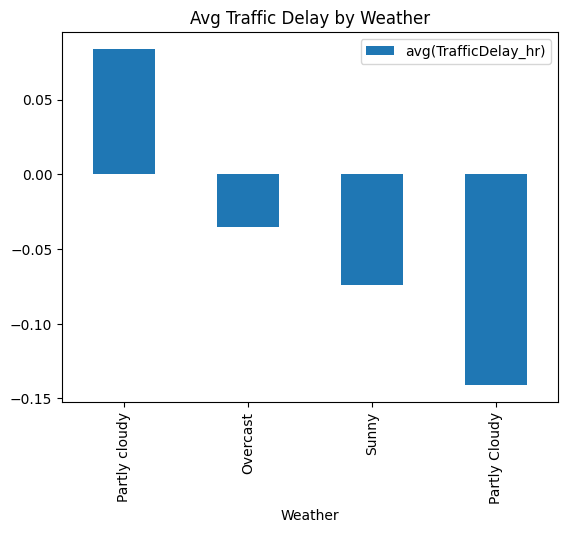

In [24]:
weather_delay = df_spark.groupBy("Weather").avg("TrafficDelay_hr") \
    .orderBy("avg(TrafficDelay_hr)", ascending=False).toPandas()

weather_delay.plot(kind="bar", x="Weather", y="avg(TrafficDelay_hr)", title="Avg Traffic Delay by Weather")


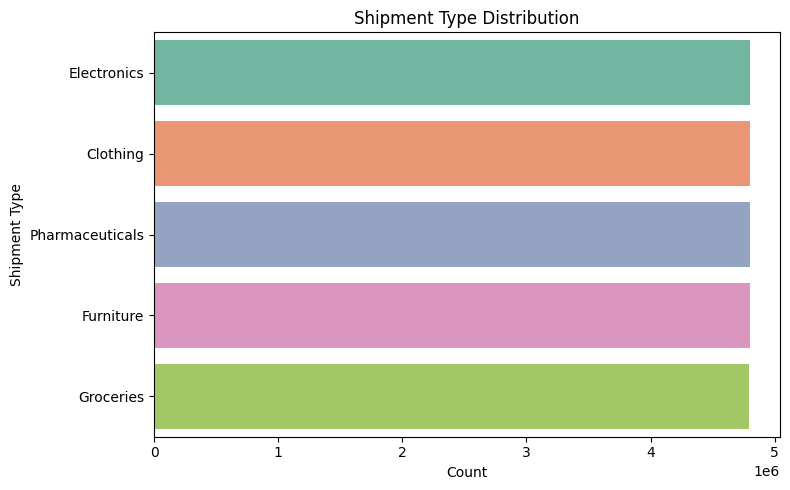

In [106]:
plt.figure(figsize=(8, 5))
sns.barplot(data=shipment_type_pd, x="count", y="ShipmentType", palette="Set2")
plt.title("Shipment Type Distribution")
plt.xlabel("Count")
plt.ylabel("Shipment Type")
plt.tight_layout()
plt.show()

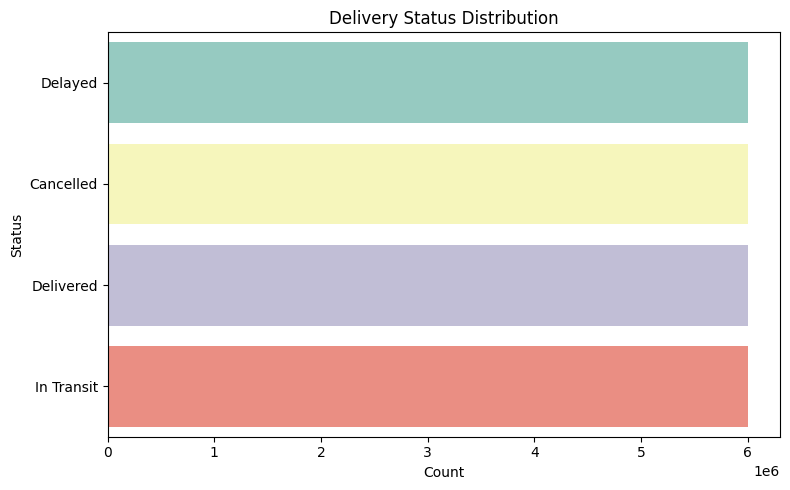

In [108]:
plt.figure(figsize=(8, 5))
sns.barplot(data=delivery_status_pd, x="count", y="DeliveryStatus", palette="Set3")
plt.title("Delivery Status Distribution")
plt.xlabel("Count")
plt.ylabel("Status")
plt.tight_layout()
plt.show()

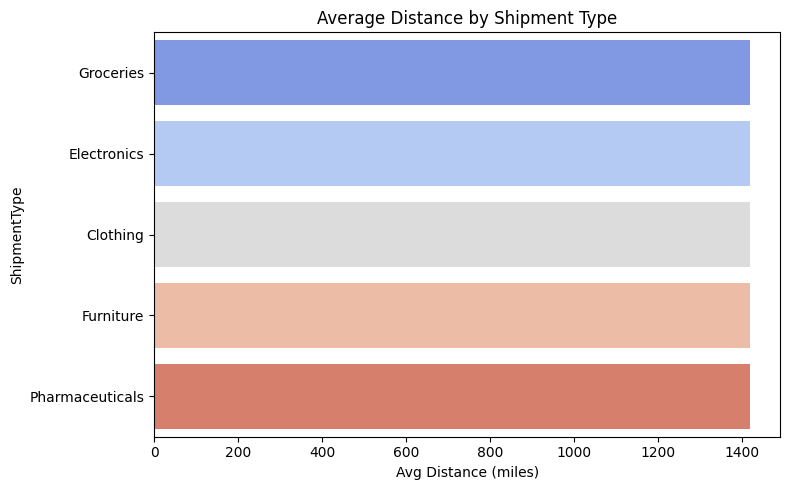

In [110]:
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_distance_pd, x="AverageDistance", y="ShipmentType", palette="coolwarm")
plt.title("Average Distance by Shipment Type")
plt.xlabel("Avg Distance (miles)")
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/cleanenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


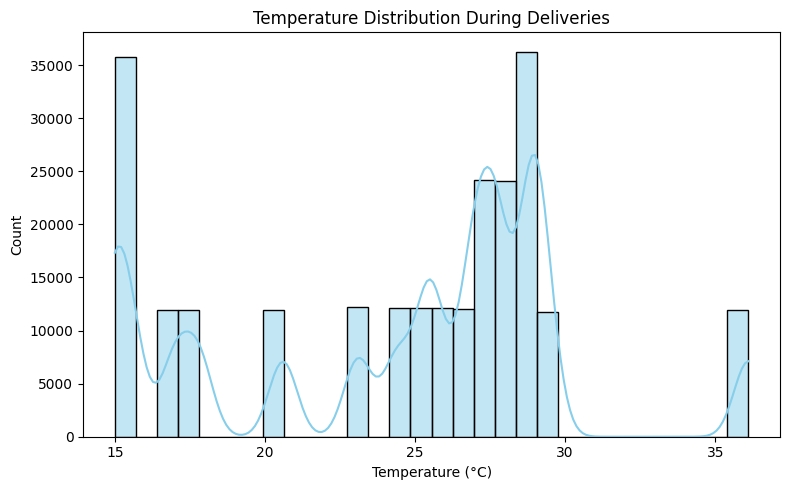

In [112]:
plt.figure(figsize=(8, 5))
sns.histplot(data=temp_pd, x="Temperature_C", bins=30, kde=True, color="skyblue")
plt.title("Temperature Distribution During Deliveries")
plt.xlabel("Temperature (°C)")
plt.tight_layout()
plt.show()

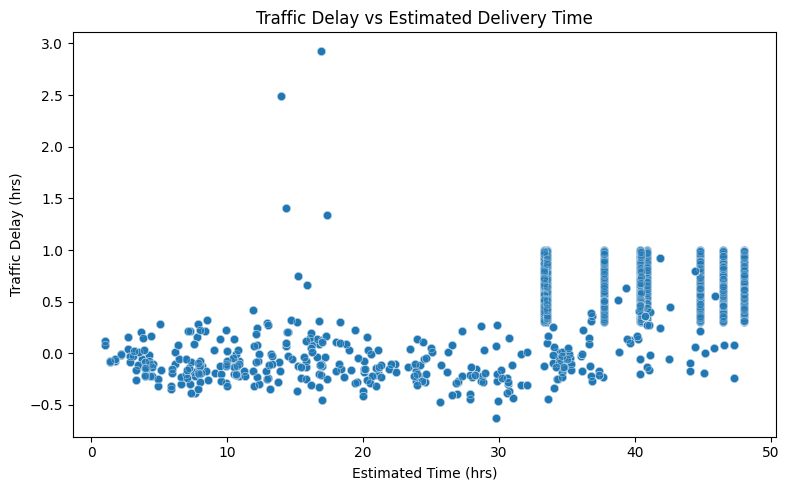

In [114]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=traffic_vs_estimated_pd, x="EstimatedTime_hr", y="TrafficDelay_hr", alpha=0.3)
plt.title("Traffic Delay vs Estimated Delivery Time")
plt.xlabel("Estimated Time (hrs)")
plt.ylabel("Traffic Delay (hrs)")
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_matrix = pd.read_csv("google_distance_matrix_coords.csv")

distance_matrix = df_matrix.pivot(index='from_city', columns='to_city', values='distance_miles')


In [28]:
distance_matrix

to_city,"Baltimore, MD","Boise, ID","Boston, MA","Chicago, IL","Cincinnati, OH","Denver, CO","Detroit, MI","Harrisburg, PA","Houston, TX","Las Vegas, NV","Miami, FL","Nashville, TN","New York City, NY","Orlando, FL","Pittsburgh, PA","Portland, ME","Portland, OR","Salt Lake City, UT","Seattle, WA","Washington, DC"
from_city,,,,,,,,,,,,,,,,,,,,
"Baltimore, MD",NaN,2379.12,404.47,701.97,507.89,1664.90,526.07,79.14,1445.51,2410.76,1096.18,702.81,191.51,885.56,247.36,503.07,2805.60,2083.83,2763.69,38.34
"Boise, ID",2381.24,NaN,2661.77,1694.11,1928.57,816.17,1958.96,2336.44,1844.53,623.96,2832.77,1924.96,2468.48,2608.19,2139.43,2760.37,430.08,339.27,504.07,2374.75
"Boston, MA",400.82,2660.63,NaN,983.49,882.54,1971.74,706.74,390.45,1847.88,2715.65,1497.18,1105.18,215.40,1286.56,571.96,112.17,3087.12,2365.34,3045.21,439.34
"Chicago, IL",703.27,1692.55,983.80,NaN,295.44,1003.66,282.23,658.48,1083.36,1747.57,1378.45,470.64,790.51,1153.87,461.46,1082.40,2119.03,1397.26,2063.60,696.79
"Cincinnati, OH",507.35,1945.91,882.58,294.83,NaN,1194.25,262.50,471.33,1049.04,1940.11,1122.87,272.43,639.08,898.28,288.21,981.18,2372.40,1650.62,2327.54,500.87
"Denver, CO",1664.32,816.00,1971.57,1003.91,1192.87,NaN,1268.76,1628.30,1030.76,748.95,2065.47,1157.66,1778.28,1840.88,1449.22,2070.17,1242.49,520.71,1316.47,1657.84
"Detroit, MI",528.70,1960.09,706.69,283.86,264.23,1271.20,NaN,483.91,1311.92,2015.10,1385.75,535.31,615.95,1161.16,286.89,805.29,2386.57,1664.80,2345.58,522.22
"Harrisburg, PA",79.51,2335.11,383.46,657.96,471.20,1628.21,482.06,NaN,1462.25,2374.07,1168.03,719.56,170.44,957.41,203.34,482.06,2761.59,2039.82,2719.68,119.67
"Houston, TX",1446.02,1841.17,1841.36,1082.83,1047.76,1027.13,1299.94,1462.34,NaN,1456.63,1187.17,778.82,1628.34,962.59,1335.64,1939.96,2267.65,1476.62,2341.64,1408.38


In [32]:
distance_matrix.shape

(20, 20)

/opt/anaconda3/envs/cleanenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


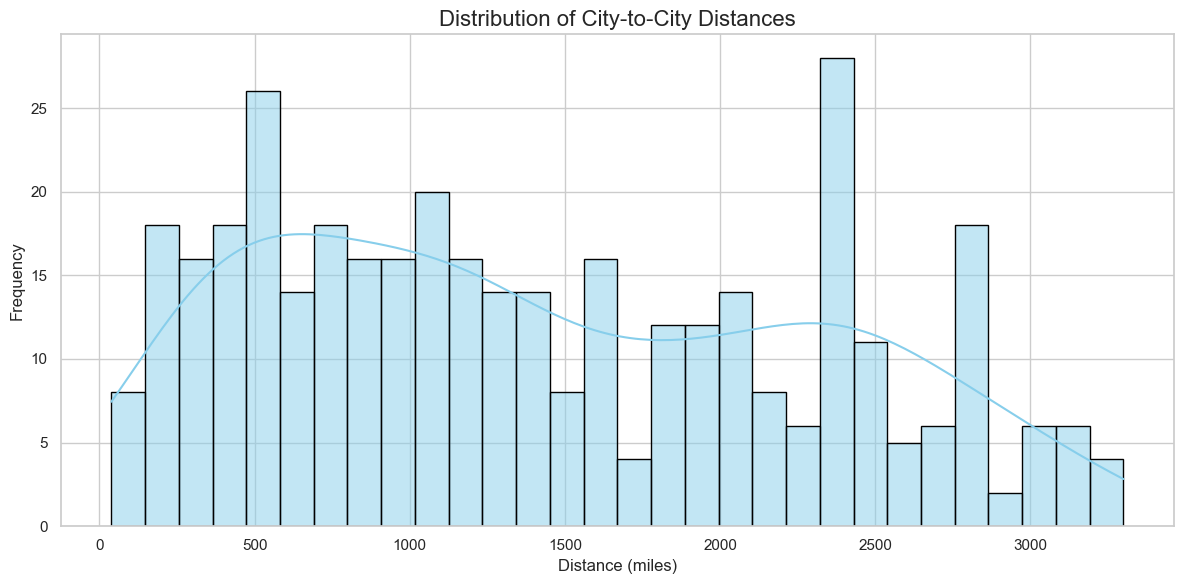

In [124]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df_matrix["distance_miles"], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of City-to-City Distances", fontsize=16)
plt.xlabel("Distance (miles)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

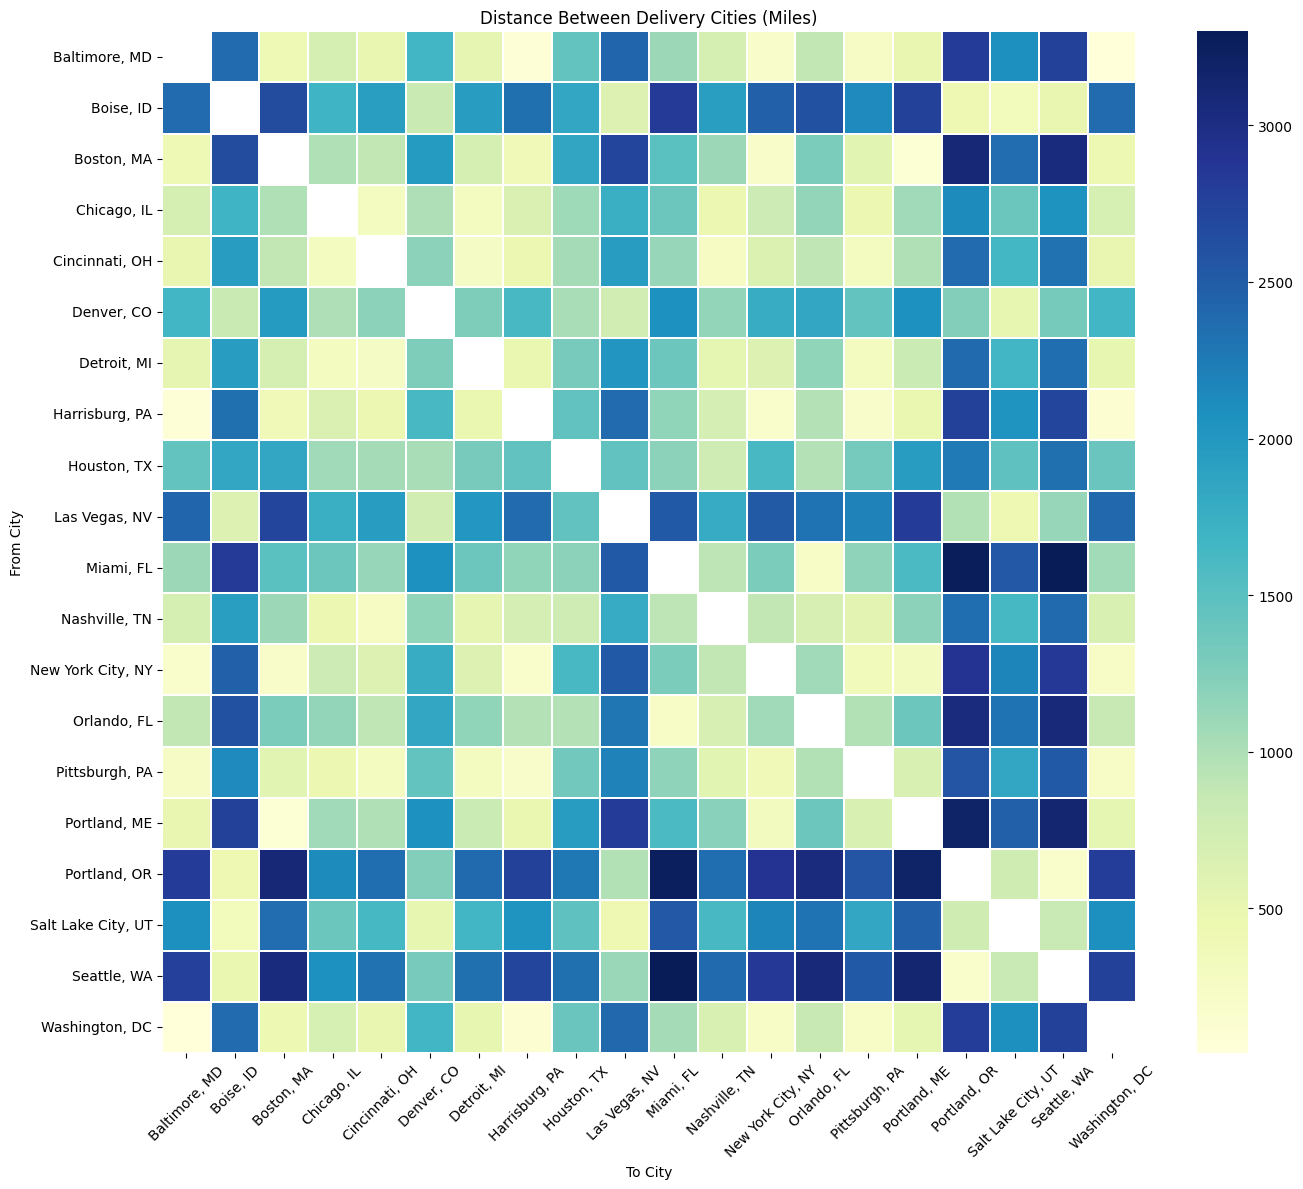

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df_matrix.pivot(index='from_city', columns='to_city', values='distance_miles')

plt.figure(figsize=(14, 12))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.3)
plt.title("Distance Between Delivery Cities (Miles)")
plt.xlabel("To City")
plt.ylabel("From City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Fill missing and scale
distance_clustering = pivot.fillna(pivot.mean())
scaled = StandardScaler().fit_transform(distance_clustering)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(scaled)

cluster_df = pd.DataFrame({
    "City": distance_clustering.index,
    "Cluster": labels
})
cluster_df.sort_values("Cluster")


,City,Cluster
0,"Baltimore, MD",0
15,"Portland, ME",0
14,"Pittsburgh, PA",0
12,"New York City, NY",0
11,"Nashville, TN",0
7,"Harrisburg, PA",0
19,"Washington, DC",0
4,"Cincinnati, OH",0
3,"Chicago, IL",0
2,"Boston, MA",0


In [46]:
import pandas as pd
import networkx as nx

df = pd.read_csv("google_distance_matrix_coords.csv")

In [126]:
#create the graph
G = nx.DiGraph()
for _, row in df.iterrows():
    from_city = row['from_city']
    to_city = row['to_city']
    distance = row['distance_miles']
    if pd.notnull(distance):
        G.add_edge(from_city, to_city, weight=distance)


In [50]:
# Run Dijkstra from Harrisburg, PA to each delivery city 
source_city = "Harrisburg, PA"
target_cities = sorted(set(df['to_city'].unique()) - {source_city})

dijkstra_results = []
for target in target_cities:
    try:
        path = nx.dijkstra_path(G, source=source_city, target=target, weight='weight')
        dist = nx.dijkstra_path_length(G, source=source_city, target=target, weight='weight')
        dijkstra_results.append({"from": source_city, "to": target, "path": path, "distance_miles": round(dist, 2)})
    except nx.NetworkXNoPath:
        dijkstra_results.append({"from": source_city, "to": target, "path": None, "distance_miles": None})

df_dijkstra = pd.DataFrame(dijkstra_results)


In [56]:
df_dijkstra

,from,to,path,distance_miles
0,"Harrisburg, PA","Baltimore, MD","[Harrisburg, PA, Baltimore, MD]",79.51
1,"Harrisburg, PA","Boise, ID","[Harrisburg, PA, Boise, ID]",2335.11
2,"Harrisburg, PA","Boston, MA","[Harrisburg, PA, Boston, MA]",383.46
3,"Harrisburg, PA","Chicago, IL","[Harrisburg, PA, Chicago, IL]",657.96
4,"Harrisburg, PA","Cincinnati, OH","[Harrisburg, PA, Cincinnati, OH]",471.20
5,"Harrisburg, PA","Denver, CO","[Harrisburg, PA, Denver, CO]",1628.21
6,"Harrisburg, PA","Detroit, MI","[Harrisburg, PA, Detroit, MI]",482.06
7,"Harrisburg, PA","Houston, TX","[Harrisburg, PA, Houston, TX]",1462.25
8,"Harrisburg, PA","Las Vegas, NV","[Harrisburg, PA, Las Vegas, NV]",2374.07
9,"Harrisburg, PA","Miami, FL","[Harrisburg, PA, Miami, FL]",1168.03


In [62]:
import heapq

def greedy_tsp_custom(G, start):
    visited = set()
    path = [start]
    current = start
    visited.add(current)

    while len(visited) < len(G.nodes):
        # Find the nearest unvisited neighbor
        neighbors = [
            (G[current][neighbor]["weight"], neighbor)
            for neighbor in G.neighbors(current)
            if neighbor not in visited
        ]
        if not neighbors:
            break
        heapq.heapify(neighbors)
        _, next_node = heapq.heappop(neighbors)
        path.append(next_node)
        visited.add(next_node)
        current = next_node

    path.append(start)  
    return path


In [64]:
G_undirected = G.to_undirected()
tsp_path = greedy_tsp_custom(G_undirected, start="Harrisburg, PA")

# Calculate total TSP distance
tsp_total_distance = sum(
    G_undirected[tsp_path[i]][tsp_path[i+1]]['weight']
    for i in range(len(tsp_path) - 1)
)

print("TSP path generated starting from Harrisburg:\n")
print(" -> ".join(tsp_path))
print(f"\n Total Distance: {round(tsp_total_distance, 2)} miles")


✅ TSP path generated starting from Harrisburg:
Harrisburg, PA -> Baltimore, MD -> Washington, DC -> New York City, NY -> Boston, MA -> Portland, ME -> Pittsburgh, PA -> Detroit, MI -> Cincinnati, OH -> Nashville, TN -> Chicago, IL -> Denver, CO -> Salt Lake City, UT -> Boise, ID -> Portland, OR -> Seattle, WA -> Las Vegas, NV -> Houston, TX -> Orlando, FL -> Miami, FL -> Harrisburg, PA
Total Distance: 10047.69 miles


In [120]:
import folium

# Generate coordinates for cities
city_coords = {
    "Harrisburg, PA": [40.2732, -76.8844],
    "Nashville, TN": [36.1627, -86.7816],
    "Salt Lake City, UT": [40.7608, -111.8910],
    "Denver, CO": [39.7392, -104.9903],
    "New York City, NY": [40.7128, -74.0060],
    "Cincinnati, OH": [39.1031, -84.5120],
    "Seattle, WA": [47.6062, -122.3321],
    "Orlando, FL": [28.5383, -81.3792],
    "Washington, DC": [38.9072, -77.0369],
    "Detroit, MI": [42.3314, -83.0458],
    "Houston, TX": [29.7604, -95.3698],
    "Miami, FL": [25.7617, -80.1918],
    "Baltimore, MD": [39.2904, -76.6122],
    "Pittsburgh, PA": [40.4406, -79.9959],
    "Las Vegas, NV": [36.1699, -115.1398],
    "Chicago, IL": [41.8781, -87.6298],
    "Boston, MA": [42.3601, -71.0589],
    "Boise, ID": [43.6150, -116.2023],
    "Portland, ME": [43.6591, -70.2553],
    "Portland, OR": [45.5051, -122.6765],
}

if 'tsp_path' not in locals():
    tsp_path = list(city_coords.keys())

# Initialize map centered at Harrisburg
map_route = folium.Map(location=city_coords["Harrisburg, PA"], zoom_start=5)

# Plot cities and route lines
for i, city in enumerate(tsp_path):
    coord = city_coords.get(city)
    if coord:
        folium.Marker(location=coord, popup=city, tooltip=city).add_to(map_route)
        if i < len(tsp_path) - 1:
            next_city = tsp_path[i + 1]
            next_coord = city_coords.get(next_city)
            if next_coord:
                folium.PolyLine([coord, next_coord], color="blue", weight=2.5, opacity=0.8).add_to(map_route)


display(map_route)

In [78]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv("google_distance_matrix_coords.csv")

#Build distance lookup dictionary
cities = sorted(set(df['from_city'].unique()) | set(df['to_city'].unique()))
distance_lookup = {city: {} for city in cities}
for _, row in df.iterrows():
    if pd.notnull(row['distance_miles']):
        distance_lookup[row['from_city']][row['to_city']] = row['distance_miles']


In [80]:
#Genetic Algorithm Setup
def route_distance(route):
    dist = 0
    for i in range(len(route) - 1):
        dist += distance_lookup[route[i]].get(route[i+1], 0)
    dist += distance_lookup[route[-1]].get(route[0], 0)  # return to start
    return dist

def create_route(city_list):
    route = city_list[:]
    random.shuffle(route)
    return route

def initial_population(pop_size, city_list):
    return [create_route(city_list) for _ in range(pop_size)]

def rank_routes(population):
    return sorted([(route, route_distance(route)) for route in population], key=lambda x: x[1])

def selection(ranked, elite_size):
    selected = [route for route, _ in ranked[:elite_size]]
    rest = random.choices([route for route, _ in ranked], k=len(ranked) - elite_size)
    return selected + rest

def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child_p1 = parent1[start:end]
    child = child_p1 + [city for city in parent2 if city not in child_p1]
    return child

def mutate(route, mutation_rate=0.01):
    for swapped in range(len(route)):
        if random.random() < mutation_rate:
            swap_with = int(random.random() * len(route))
            route[swapped], route[swap_with] = route[swap_with], route[swapped]
    return route

def evolve(population, elite_size, mutation_rate):
    ranked = rank_routes(population)
    selected = selection(ranked, elite_size)
    children = []

    for i in range(elite_size):
        children.append(selected[i])

    for i in range(len(population) - elite_size):
        parent1 = random.choice(selected)
        parent2 = random.choice(selected)
        child = crossover(parent1, parent2)
        children.append(mutate(child, mutation_rate))

    return children, ranked[0]



In [82]:
#Run the Genetic Algorithm
city_list = [c for c in cities if c != "Harrisburg, PA"]
generations = 200
population = initial_population(100, city_list)
best_route = None

for i in range(generations):
    population, best = evolve(population, elite_size=20, mutation_rate=0.02)
    if i % 10 == 0:
        print(f"Gen {i} Best Distance: {round(best[1], 2)}")
    best_route = best

# Final result
ga_route = ["Harrisburg, PA"] + best_route[0] + ["Harrisburg, PA"]
ga_total_distance = round(route_distance(ga_route), 2)

ga_route, ga_total_distance


Gen 0 Best Distance: 21205.43
Gen 10 Best Distance: 15095.71
Gen 20 Best Distance: 12581.53
Gen 30 Best Distance: 11937.76
Gen 40 Best Distance: 10362.72
Gen 50 Best Distance: 10362.72
Gen 60 Best Distance: 10207.41
Gen 70 Best Distance: 9828.87
Gen 80 Best Distance: 9828.87
Gen 90 Best Distance: 9828.87
Gen 100 Best Distance: 9828.87
Gen 110 Best Distance: 9828.87
Gen 120 Best Distance: 9828.87
Gen 130 Best Distance: 9803.75
Gen 140 Best Distance: 9803.75
Gen 150 Best Distance: 9679.61
Gen 160 Best Distance: 9679.61
Gen 170 Best Distance: 9679.61
Gen 180 Best Distance: 9679.61
Gen 190 Best Distance: 9679.61


(['Harrisburg, PA',
  'Pittsburgh, PA',
  'Cincinnati, OH',
  'Nashville, TN',
  'Orlando, FL',
  'Miami, FL',
  'Houston, TX',
  'Las Vegas, NV',
  'Salt Lake City, UT',
  'Boise, ID',
  'Portland, OR',
  'Seattle, WA',
  'Denver, CO',
  'Chicago, IL',
  'Detroit, MI',
  'Portland, ME',
  'Boston, MA',
  'New York City, NY',
  'Baltimore, MD',
  'Washington, DC',
  'Harrisburg, PA'],
 9758.64)

In [118]:
print("\nBest GA Route:\n")
print(" -> ".join(ga_route))
print(f"\nTotal Distance: {ga_total_distance} miles")


Best GA Route:

Harrisburg, PA -> Pittsburgh, PA -> Cincinnati, OH -> Nashville, TN -> Orlando, FL -> Miami, FL -> Houston, TX -> Las Vegas, NV -> Salt Lake City, UT -> Boise, ID -> Portland, OR -> Seattle, WA -> Denver, CO -> Chicago, IL -> Detroit, MI -> Portland, ME -> Boston, MA -> New York City, NY -> Baltimore, MD -> Washington, DC -> Harrisburg, PA

Total Distance: 9758.64 miles


In [122]:
import folium

# Create map
map_route = folium.Map(location=city_coords["Harrisburg, PA"], zoom_start=5)

for i, city in enumerate(ga_route):
    coord = city_coords.get(city)
    if coord:
        folium.Marker(location=coord, popup=city).add_to(map_route)
        if i < len(ga_route) - 1:
            next_city = ga_route[i + 1]
            next_coord = city_coords.get(next_city)
            if next_coord:
                folium.PolyLine([coord, next_coord], color="blue", weight=2.5).add_to(map_route)

display(map_route)